In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Expresiones regulares
import re

#Para el filtrado de numeros
from string import digits

%matplotlib inline


In [0]:
#Modelo de regresion lineal
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

In [0]:
!pip install unidecode

In [0]:
#Para acentos y tildes
from unidecode import unidecode

In [0]:
#Natural Language Toolkit: NLTK is a leading platform for building Python programs to work with human language data
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [51]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
#Para la Red Neuronal
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


In [0]:
!pip install numpy==1.16.1

In [0]:
!pip install pandas==0.24.1

In [3]:
print(np.__version__)
print(pd.__version__)

1.16.1
0.24.1


## Lectura de los datos

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
ham_dir = '/content/gdrive/My Drive/RN/datos/spam-filter/easy_ham/'
spam_dir = '/content/gdrive/My Drive/RN/datos/spam-filter/spam/'
spam_2_dir = '/content/gdrive/My Drive/RN/datos/spam-filter/spam_2/'

In [0]:
#Se leen todos los ficheros de cada folder y se concatenan. Arreglo de archivos.
ham_files = [os.path.join(ham_dir, f) for f in os.listdir(ham_dir)]
spam_files = [os.path.join(spam_dir, f) for f in os.listdir(spam_dir)]
spam_files += [os.path.join(spam_2_dir, f) for f in os.listdir(spam_2_dir)]

In [9]:
print(len(ham_files))
print(len(spam_files))

2501
1899


## Limpieza de los datos

### Eliminando Metadata
Borra el primer bloque del mensaje hasta encontrar la primera linea en blanco: **'\n'**.

In [0]:
ham = []
spam = []

for file in ham_files:
    with open(file, encoding='latin-1') as f:
        lines = f.readlines()
        for line in lines:
            lines = lines[1:]
            if line == '\n':
                break
        ham.append(lines)

for file in spam_files:
    with open(file,encoding='latin-1') as f:
        lines = f.readlines()
        for line in lines:
            lines = lines[1:]
            if line == '\n':
                break
        spam.append(lines)        


### Eliminando etiquetas HTML
Para eliminar etiquetas html se utiliza el modulo de expresiones regulares (re).

In [0]:
tag = re.compile(r'<[^>]+>')
url = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
email = re.compile(r'\S*@\S*\s?')

In [0]:
for i, file in enumerate(ham):
    text = ''.join(file)
    
    text = re.sub(tag,'', text)
    text = re.sub(url,'', text)
    text = re.sub(email,'', text)
    
    text = text.split('\n')
    ham[i] = text

In [13]:
ham[0]

['',
 "No I was just a little confused because I'm running procmail on a gateway",
 'and sits between the external sendmail box and internal exchange bridgehead',
 "server.  So there isn't any delivery to the local system.",
 '',
 "The only email it gets is inbound at the moment and we're looking to get rid",
 'of complication and go back to two boxes.  I did a test which looked like',
 'you guys are right about procmail, but testing is very limited due to the',
 "config I currently have.  It's just confusing when set up as a gateway.",
 '',
 '-Jason',
 '',
 '-----Original Message-----',
 'From: Stephane Lentz Sent: Monday, September 23, 2002 2:50 PM',
 'To: Subject: Re: [SAtalk] separate inbound and outbound',
 '',
 '',
 'On Mon, Sep 23, 2002 at 02:26:34PM -0700, Jason Qualkenbush wrote:',
 '> ',
 '> Is there is way to separate inbound and outbound email so that I only',
 'check',
 '> for spam on inbound mail and ignore the outbound?',
 '> ',
 "> I'm using Sendmail and running procmai

In [0]:
for i, file in enumerate(spam):
    text = ''.join(file)
    
    text = re.sub(tag, '', text)
    text = re.sub(url, '', text)
    text = re.sub(email, '', text)
    
    text = text.split('\n')
    spam[i] = text
    

In [15]:
spam[0]

['',
 '',
 '',
 '',
 '',
 '',
 '  ',
 '  ',
 '    ',
 '      ',
 '    ',
 '  ',
 '    ',
 '      ',
 '    ',
 'Save up to 70% on Life Insurance.',
 'Why Spend More Than You Have To?',
 '',
 'Life Quote Savings',
 '',
 '',
 '',
 '',
 '',
 '',
 '  ',
 '',
 '  ',
 '  ',
 '    Ensurin=',
 'g your ',
 "      family's financial security is very important. Life Quote Savings ma=",
 'kes ',
 '      buying life insurance simple and affordable. We Provide FREE Access =',
 'to The ',
 '      Very Best Companies and The Lowest Rates.',
 '  ',
 '    ',
 '      ',
 '        ',
 '        ',
 '          Life Quote Savings is FAST, EAS=',
 'Y and ',
 '            SAVES you money! Let us help you get started with the best val=',
 'ues in ',
 '            the country on new coverage. You can SAVE hundreds or even tho=',
 'usands ',
 '            of dollars by requesting a FREE quote from Lifequote Savings. =',
 'Our ',
 '            service will take you less than 5 minutes to complete. Shop an=',
 'd ',

### Eliminar espacios y lineas vacias al inicio y al final del mensaje

In [0]:
for i, file in enumerate(ham):
    temp = []
    for line in file:
        line = line.strip()
        if line:
            temp.append(line)
    ham[i] = temp
    

In [17]:
ham[1]

["This is just an semi-educated guess - if I'm wrong, someone please correct",
 'me!',
 "Spamd setuid's to the user running spamc. Since you're calling spamc from a",
 "global procmailrc file, it's being run as root (most likely). If called as",
 "root, spamd won't open user_prefs files.",
 '>>From the spamc man page:',
 '-u username',
 'This argument has been semi-obsoleted.  To have spamd use',
 'per-user-config files, run spamc as the user whose config',
 "files spamd should load.  If you're running spamc as some",
 'other user though (eg. root, mail, nobody, cyrus, etc.)',
 'then you can still use this flag.',
 'The solution is to set DROPPRIVS=yes in /etc/procmailrc, just before running',
 'spamc. From the procmailrc man page:',
 "DROPPRIVS   If set to `yes' procmail will drop all privileges",
 'it might have had (suid or sgid).  This  is  only',
 'useful  if  you  want  to guarantee that the bottom',
 'half of the /etc/procmailrc file is executed on',
 'behalf of the recipient.',

In [0]:
for i, file in enumerate(spam):
    temp = []
    for line in file:
        line = line.strip()
        if line:
            temp.append(line)
    spam[i] = temp

In [19]:
spam[0]

['Save up to 70% on Life Insurance.',
 'Why Spend More Than You Have To?',
 'Life Quote Savings',
 'Ensurin=',
 'g your',
 "family's financial security is very important. Life Quote Savings ma=",
 'kes',
 'buying life insurance simple and affordable. We Provide FREE Access =',
 'to The',
 'Very Best Companies and The Lowest Rates.',
 'Life Quote Savings is FAST, EAS=',
 'Y and',
 'SAVES you money! Let us help you get started with the best val=',
 'ues in',
 'the country on new coverage. You can SAVE hundreds or even tho=',
 'usands',
 'of dollars by requesting a FREE quote from Lifequote Savings. =',
 'Our',
 'service will take you less than 5 minutes to complete. Shop an=',
 'd',
 'compare. SAVE up to 70% on all types of Life insurance!',
 'Click Here For Your=',
 'Free Quote!',
 "Protecting your family is the best investment you'll eve=",
 'r',
 'make!',
 'If you are in receipt of this=',
 'email',
 'in error and/or wish to be removed from our list, PLEASE CLICK HERE AND TYPE =',
 'R

### Eliminar pares, números y simbolos

Pares clave:valor

In [0]:
values = re.compile(r'([a-zA-Z]|[0-9]|[-_.&+])+:')

for i, file in enumerate(ham):
    temp = []
    for line in file:
        if not re.match(values, line):
            temp.append(line)
    ham[i] = temp
    
for i, file in enumerate(spam):
    temp = []
    for line in file:
        if not re.match(values, line):
            temp.append(line)
    spam[i] = temp

Eliminado de simbolos

In [0]:

symbols = re.compile(r'[-_!¡#$%&\/\¿?"\'<=>,;:\[\]\(\)\\\+\.\}\{~\`¨\^\|°@\+*]+')

for i, file in enumerate(ham):
    temp = ' '.join(file)
    temp = re.sub(symbols, ' ', temp)
    ham[i] = temp
    
for i, file in enumerate(spam):
    temp = ' '.join(file)
    temp = re.sub(symbols, ' ', temp)
    spam[i] = temp

Eliminando numeros

In [0]:

numbers = str.maketrans('', '', digits)

ham = [file.translate(numbers) for file in ham]
spam = [file.translate(numbers) for file in spam]

### Pasar a minúsculas

In [0]:
ham_minus = [file.lower() for file in ham]
spam_minus = [file.lower() for file in spam]

In [31]:
ham_minus[0]

'no i was just a little confused because i m running procmail on a gateway and sits between the external sendmail box and internal exchange bridgehead server   so there isn t any delivery to the local system  the only email it gets is inbound at the moment and we re looking to get rid of complication and go back to two boxes   i did a test which looked like you guys are right about procmail  but testing is very limited due to the config i currently have   it s just confusing when set up as a gateway   jason  original message  on mon  sep    at   pm    jason qualkenbush wrote      is there is way to separate inbound and outbound email so that i only check   for spam on inbound mail and ignore the outbound      i m using sendmail and running procmail on the gateway to call spamassassin    i know it more of a sendmail question  but my google searches have only   turned up people trying to log all inbound and outbound email    using procmail  spamassassin doesn t get called for outgoing em

In [32]:
spam_minus[0]

'save up to   on life insurance  why spend more than you have to  life quote savings ensurin  g your family s financial security is very important  life quote savings ma  kes buying life insurance simple and affordable  we provide free access   to the very best companies and the lowest rates  life quote savings is fast  eas  y and saves you money  let us help you get started with the best val  ues in the country on new coverage  you can save hundreds or even tho  usands of dollars by requesting a free quote from lifequote savings    our service will take you less than  minutes to complete  shop an  d compare  save up to   on all types of life insurance  click here for your  free quote  protecting your family is the best investment you ll eve  r make  if you are in receipt of this  email in error and or wish to be removed from our list  please click here and type   remove  if you reside in any state which prohibits e mail solicitations for insuran  ce  please disregard this email '

### Transformando texto en Tokens

Tokenizers divide strings into lists of substrings. For example, tokenizers can be used to find the words and punctuation in a string:


In [0]:
s = '''Good muffins cost $3.88\nin New York.  Please buy me... two of them.\n\nThanks.'''
word_tokenize(s)
['Good', 'muffins', 'cost', '$', '3.88', 'in', 'New', 'York', '.','Please', 'buy', 'me', 'two', 'of', 'them', '.', 'Thanks', '.']

In [0]:
ham_token = [word_tokenize(file) for file in ham_minus]
spam_token = [word_tokenize(file) for file in spam_minus]

In [0]:
ham_token[0]

In [0]:
spam_token[0]

The isalpha() methods returns “True” if all characters in the string are alphabets, Otherwise, It returns “False”.

In [0]:
for i, file in enumerate(ham_token):
    ham_token[i] = [token for token in file if token.isalpha()]
    
for i, file in enumerate(spam_token):
    spam_token[i] = [token for token in file if token.isalpha()]

### Eliminando acentos, tildes, stopwords y conjugaciones

Eliminado acentos y tildes

In [0]:
for i, file in enumerate(ham_token):
    ham_token[i] = [unidecode(token) for token in file]
    
for i, file in enumerate(spam_token):
    spam_token[i] = [unidecode(token) for token in file]

Text may contain stop words like **‘the’, ‘is’, ‘are’.** Stop words can be filtered from the text to be processed

In [0]:
stop_words = set(stopwords.words('english'))

In [0]:
for i, file in enumerate(ham_token):
    ham_token[i] = [token for token in file if not token in stop_words]
    
for i, file in enumerate(spam_token):
    spam_token[i] = [token for token in file if not token in stop_words]

In [0]:
ham_token[i]

In [0]:
spam_token[0]

**Eliminado conjugaciones**

Stemmers remove morphological affixes from words, leaving only the word stem.

In [0]:
stemmer = PorterStemmer()

In [65]:
#Example
plurals = ['caresses', 'flies', 'dies', 'mules', 'denied']
singles = [stemmer.stem(plural) for plural in plurals]
print(singles)

['caress', 'fli', 'die', 'mule', 'deni']


In [0]:
for i, file in enumerate(ham_token):
    ham_token[i] = [stemmer.stem(token) for token in file]

for i, file in enumerate(spam_token):
    spam_token[i] = [stemmer.stem(token) for token in file]


## Bag of Words

In [107]:
from collections import Counter

ham_bag = []
for file in ham_token:
    ham_bag += file
    
spam_bag = []
for file in spam_token:
    spam_bag += file
    
bag_word = ham_bag + spam_bag   
dictionary = Counter(bag_word)

print("Bag of Words:",len(bag_word)) 
print("Dictionary:",len(dictionary))

Bag of Words: 712626
Dictionary: 64895


**Frecuencia de aparición**

**most_common(n):** Return a list of the n most common elements and their counts from the most common to the least

In [113]:
most_frequence = dictionary.most_common(2500)
print(most_frequence)


[('nbsp', 11289), ('e', 8236), ('c', 5804), ('mail', 4433), ('b', 4240), ('email', 3771), ('list', 3669), ('use', 3534), ('get', 3378), ('free', 3135), ('one', 2946), ('time', 2635), ('receiv', 2279), ('make', 2191), ('f', 2169), ('peopl', 2156), ('click', 2154), ('work', 2072), ('new', 2070), ('busi', 2050), ('messag', 2038), ('like', 2029), ('pleas', 2024), ('us', 1938), ('remov', 1904), ('order', 1884), ('address', 1883), ('inform', 1880), ('money', 1766), ('would', 1757), ('want', 1664), ('year', 1641), ('send', 1619), ('compani', 1541), ('need', 1530), ('day', 1430), ('report', 1405), ('also', 1395), ('site', 1395), ('name', 1391), ('program', 1386), ('go', 1382), ('offer', 1368), ('state', 1367), ('servic', 1307), ('market', 1304), ('call', 1278), ('way', 1224), ('look', 1212), ('home', 1209), ('may', 1204), ('internet', 1197), ('first', 1179), ('includ', 1178), ('product', 1177), ('help', 1160), ('world', 1155), ('see', 1136), ('right', 1134), ('even', 1134), ('know', 1117), ('t

In [114]:
vocabulary = {w for w, c in most_frequence}
print(vocabulary)

{'', 'highest', 'battl', 'planet', 'lie', 'vision', 'main', 'grant', 'cost', 'bu', 'bug', 'young', 'carrier', 'btw', 'group', 'solut', 'justin', 'pressur', 'browser', 'unsubscrib', 'corner', 'odd', 'abil', 'automat', 'usag', 'edificio', 'confer', 'steve', 'bf', 'earth', 'titl', 'document', 'print', 'threaten', 'diploma', 'ftd', 'peopl', 'recov', 'deni', 'jersey', 'ft', 'scan', 'senior', 'alon', 'doubl', 'later', 'maximum', 'casino', 'problem', 'spam', 'votr', 'next', 'ship', 'class', 'tt', 'spamassassin', 'thursday', 'decad', 'realiti', 'inde', 'owen', 'report', 'si', 'process', 'est', 'access', 'yr', 'england', 'forb', 'stream', 'focus', 'lawsuit', 'nextpart', 'dvd', 'calcul', 'ftr', 'administr', 'congress', 'download', '$?,', 'threat', 'item', 'encourag', 'compel', 'function', 'determin', 'random', 'farmer', 'stop', 'polici', 'recruit', 'regim', 'jar', 'slow', 'final', 'aa', 'blood', 'unless', 'compet', 'binari', 'western', 'command', 'chairman', 'arrest', 'situat', 'intern', 'phone'

##Modelo de Regresión Logística 


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import shuffle

[Convert a collection of text documents to a matrix of token counts](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [0]:
vectorizer = CountVectorizer(vocabulary=vocabulary, lowercase=False)

In [0]:
X = []
y = []

#Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X.
for file in ham_token:
    X.append(vectorizer.fit_transform([' '.join(file)]).toarray())
    y.append('ham')
    
for file in spam_token:
    X.append(vectorizer.fit_transform([' '.join(file)]).toarray())
    y.append('spam')
    
x_n = np.reshape(np.array(X), (len(X), -1))

In [0]:
data = pd.DataFrame(x_n, columns=vectorizer.get_feature_names())
data['class_y'] = np.array(y)
data = shuffle(data, random_state=12345)

In [0]:
dataset.head(25)

Construir un modelo de regresión logística como punto base para la comparación con otros modelos más complejos.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [136]:
#Split arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(data.drop(['class_y'], axis=1), data['class_y'], test_size=0.5, random_state=12345)

logistic_regression = LogisticRegression(solver='liblinear')
kfold = KFold(n_splits=20, random_state=12345)
sol = cross_val_score(logistic_regression, X_train, y_train, cv=kfold)

print(f'Mean: {sol.mean()}, Std: {sol.std()}')

Mean: 0.9777272727272729, Std: 0.01712255291076124


In [140]:
logistic_regression.fit(X_train, y_train)
logistic_regression.score(X_test, y_test)

0.9672727272727273

In [143]:
logistic_regression = LogisticRegression(solver='liblinear')
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[1220,   15],
       [  57,  908]])

## Modelo de Redes Neuronales

Construimos el modelo

In [0]:
def model_building(n,m):
  model = Sequential()
  model.add(Dense(units=n, activation='relu', input_shape=(2500,)))
  model.add(Dropout(0.3))
  model.add(Dense(units=m, activation='relu'))
  model.add(Dense(units=1, activation='sigmoid'))
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return model


Utiizar una técnica como crossvalidation u otra similar para establecer la robustez del modelo.

In [0]:
def eval_model_crossval(model, X, y, cv=10, seed=12345):
  kf = KFold(n_splits=10, random_state=seed)
  scores = cross_val_score(model, X, y, cv=kf)
  print(f'Cross Validation Score: {scores.mean():0.4f} +- {(scores.std()*2):0.4f}')


In [165]:

classifier = KerasClassifier(build_fn=model_building, n=512, m=256, epochs=10, batch_size=16, verbose=0)
eval_model_crossval(classifier, X_train, y_train, cv=10)

Cross Validation Score: 0.9709 +- 0.0183


Comparando el resultado de la validación cruzada **(0.9709 +- 0.0183)** es un poco más preciso que la regresión logistica **(0.97772 +- 0.0171)**

### Presentar métricas de desempeño para establecer las bondades y falencias de cada clasificador.

https://www.codeproject.com/Articles/1232040/Spam-classification-using-Python-and-Keras

In [0]:
import matplotlib.pyplot as pyplot
%matplotlib inline

#Tomando como referencia los valores usados para la validación cruzada:
history = classifier.fit(X_train,y_train,epochs=10,batch_size=16,validation_split=0.3)

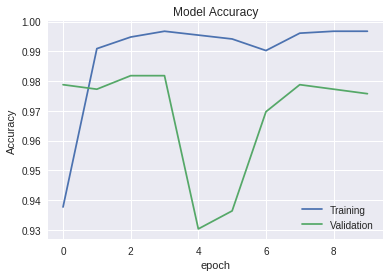

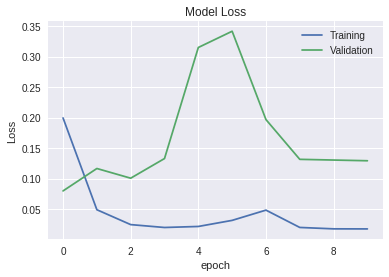

In [182]:
def plot_accuracy(history):
    pyplot.plot(history.history['acc'])
    pyplot.plot(history.history['val_acc'])
    pyplot.title('Model Accuracy')
    pyplot.ylabel('Accuracy')
    pyplot.xlabel('epoch')
    pyplot.legend(['Training', 'Validation'], loc='lower right')
    pyplot.show()

def plot_loss(history):
    pyplot.plot(history.history['loss'])
    pyplot.plot(history.history['val_loss'])
    pyplot.title('Model Loss')
    pyplot.ylabel('Loss')
    pyplot.xlabel('epoch')
    pyplot.legend(['Training', 'Validation'], loc='upper right')
    pyplot.show()


plot_accuracy(history)
plot_loss(history)

A partir de esto, vemos que los valores usados en el modelo no son lo] mejor que puede ofrecer. Es recomendable volver a ejecutar cambiando los parametros:

In [0]:
history = classifier.fit(X_train,y_train,epochs=16,batch_size=100,validation_split=0.3)

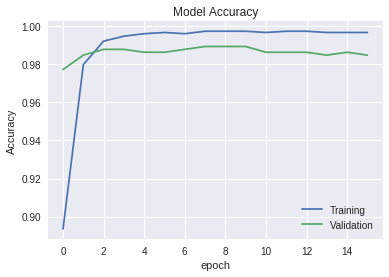

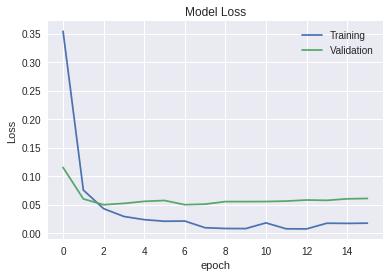

In [189]:
plot_accuracy(history)
plot_loss(history)

Obtenemos mejores resultados aumentando las iteraciones a **16** y el batch a **100**. ¿Cambiará el valor de **Cross Validation Score** con estos parametros?

In [190]:
classifier = KerasClassifier(build_fn=model_building, n=512, m=256, epochs=16, batch_size=100, verbose=0)
eval_model_crossval(classifier, X_train, y_train, cv=10)

Cross Validation Score: 0.9773 +- 0.0141


Estos parámetros representan una pequeña mejora. En síntesis, el modelo presenta una precisión de rápido crecimiento, y la perdida decae rapidamente hasta alcanzas valores cercanos a cero.